In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

# Ignore the warning, can comment this 
warnings.filterwarnings("ignore")

In [28]:
## loading data
path_data = "C:/PROJET/CRYPTO/data/"

In [ ]:

with open("C:/PROJET/CRYPTO/data/yahoo_finance/10_best_crypto_pickle", "rb") as f:
    df_multidx = pickle.load(f)

In [3]:
with open("C:/PROJET/CRYPTO/data/yahoo_finance/pickle_dict_crypto_stocks", "rb") as f:
    df_dict = pickle.load(f)

In [4]:
df_dict.keys()

dict_keys(['BCH-USD', 'BNB-USD', 'BSV-USD', 'BTC-USD', 'EOS-USD', 'ETH-USD', 'LTC-USD', 'USDT-USD', 'XRP-USD', 'XTZ-USD'])

In [ ]:
df_multidx.columns.get_level_values(0)

In [ ]:
df_multidx.columns.get_level_values(1)

## entry level  analysis of BTC-USD crypto currency

mplfinance library : 
https://github.com/matplotlib/mplfinance/tree/master/examples

In [5]:
btc= df_dict["BTC-USD"]

In [ ]:
btc.describe()

In [ ]:
btc.profile 

## plotting with mpl finance modules

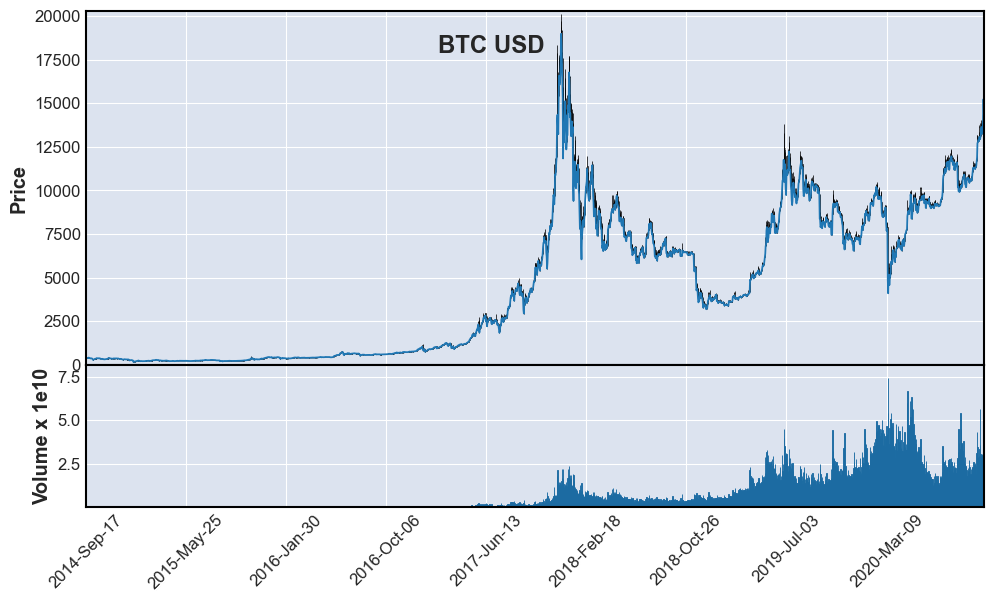

In [6]:
import mplfinance as mpf
mpf.__version__



apdict0 = mpf.make_addplot(btc["High"])
apdict1 = mpf.make_addplot(btc["Low"])
mpf.plot(btc,addplot= apdict1 , figratio=(18,10), tight_layout=True, volume=True, title ="BTC USD",
        ##savefig=path_data + 'btc-usd.png',
        )

In [ ]:
mpf.plot(btc, type='candle', style='charles',
        title='BTC-USD',
        ylabel='',
        ylabel_lower='',
        volume=True, 
        mav=(3,6,9), 
        #savefig='test-mplfiance.png',
        )

In [ ]:
%%capture
fig = mpf.figure(style='yahoo',figsize=(10,15),)
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

In [ ]:
mpf.plot(btc,ax=ax1,volume=ax2,)
fig

## An End-to-End Project on Time Series Analysis and Forecasting with Python
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [ ]:
btc.columns

In [ ]:
# resample Cloising price by monthly
day = btc['Close']
month = btc['Close'].resample('MS').mean()
week = btc['Close'].resample('W-MON').mean()

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
## further time serie anlysisimport matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
import statsmodels.api as sm
import itertools

rcParams['figure.figsize'] = 10,15
decomposition = sm.tsa.seasonal_decompose( btc['Close'].resample('MS').mean(), model='additive') #resampling by mean of month values
fig = decomposition.plot()
print("BTC EUR with monthy interval mean")
plt.show()



In [ ]:
rcParams['figure.figsize'] = 10,15
decomposition = sm.tsa.seasonal_decompose(btc['Close'].resample('W-MON').mean(), model='additive') #resampling by mean of weekly  values
fig = decomposition.plot()
print("BTC EUR with weekly interval mean")
plt.show()


In [ ]:
rcParams['figure.figsize'] = 10,15
decomposition = sm.tsa.seasonal_decompose(btc['Close'], model='additive')
fig = decomposition.plot()
print("BTC EUR with daily interval")
plt.show()

In [ ]:
y = btc["Open"].copy()
y

In [ ]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

In [ ]:
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

## checking stationarity of the data: ADF (Augmented Dickey Fuller) Test

https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

In [ ]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(btc.Close)

Test for stationarity: If the test statistic is less than the critical value, we can reject the null hypothesis (aka the series is stationary). When the test statistic is greater than the critical value, we fail to reject the null hypothesis (which means the series is not stationary).

##  KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
kpss_test(btc.Close)

Test for stationarity: If the test statistic is greater than the critical value, we reject the null hypothesis (series is not stationary). If the test statistic is less than the critical value, if fail to reject the null hypothesis (series is stationary). For the air passenger data, the value of the test statistic is greater than the critical value at all confidence intervals, and hence we can say that the series is not stationary.

In [ ]:
## making the data staionary

In [ ]:
btc

In [ ]:
btc['Close_diff'] = btc['Close'] - btc['Close'].shift(1)
btc['Close_diff'].dropna().plot()

In [ ]:
n=7
btc['Close_diff'] = btc['Close'] - btc['Close'].shift(n)

In [ ]:
btc['Close_log'] = np.log(btc['Close'])
btc['Close_log_diff'] = btc['Close_log'] - btc['Close_log'].shift(1)
btc['Close_log_diff'].dropna().plot()

In [ ]:
#saving our dataframe
btc.to_csv(path_data + "BTCUSD_stationary.csv")

In [ ]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

## ARIMA model

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))] # 7  for a period of 7 days
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(btc['Close'], # we take our daily values for a period of 7 days
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
ARIMA(0, 1, 1)x(1, 1, 1, 7)7 - AIC:31567.151428378893

In [ ]:
mod = sm.tsa.statespace.SARIMAX(btc['Close'],
                                #order=(1, 1, 1),
                                order = (1,1,1),
                                #seasonal_order=(1, 1, 0, 12),
                                seasonal_order= (1, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

In [ ]:
mod.score(results.params_object)

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
week.describe

In [ ]:
week[week.index > "2020-01-01"]

In [ ]:
week[week.index > "2019-01-01"]

## prediciton pour l'année 2020

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = btc['Close']['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price BTC USD')
plt.legend()
plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

## prédictions pour l'année 2019

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = btc['Close']['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price BTC USD')
plt.legend()
plt.show()

y_forecasted = pred.predicted_mean
y_truth = y['2019-01-07':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
pred = results.get_forecast(steps=30, )
pred_ci = pred.conf_int()
ax = btc['Close']['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price BTC USD')
plt.legend()
plt.show()


In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = week.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Dates')
ax.set_ylabel('Prices')

plt.legend()
plt.show()

## dynamic forecasting 2020

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2020-01-06'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = week['2018':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-06'), week.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('price')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2019-01-07'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

ax = week['2018':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2020-01-06'), week.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('price')

plt.legend()
plt.show()

# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2019-01-07':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2019-01-07':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

## forecasting values

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=30)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = week.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Dates')
ax.set_ylabel('Prices')

plt.legend()
plt.show()

##  ############another model with stationarized data #########

https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

https://github.com/Bounteous-Inc/Time-Series-Prediction/blob/master/Time%20Series%20Prediction%20Temp.ipynb

## Simple Exponential Smoothing (SES)

In [ ]:
btc

In [9]:
# we choose to  resample values weekly since 2015
y = btc.Open['2015':].resample('W-MON').mean()
y

Date
2015-01-05      299.118005
2015-01-12      280.751857
2015-01-19      213.801431
2015-01-26      231.322144
2015-02-02      238.919573
                  ...     
2020-10-12    10967.215960
2020-10-19    11440.048828
2020-10-26    12643.296456
2020-11-02    13500.455636
2020-11-09    14556.056641
Freq: W-MON, Name: Open, Length: 306, dtype: float64

In [14]:
y

Date
2015-01-05      299.118005
2015-01-12      280.751857
2015-01-19      213.801431
2015-01-26      231.322144
2015-02-02      238.919573
                  ...     
2020-10-12    10967.215960
2020-10-19    11440.048828
2020-10-26    12643.296456
2020-11-02    13500.455636
2020-11-09    14556.056641
Freq: W-MON, Name: Open, Length: 306, dtype: float64

In [10]:
y[y.index> "2020"]

Date
2020-01-06     7263.227190
2020-01-13     8039.492257
2020-01-20     8725.322475
2020-01-27     8555.893973
2020-02-03     9310.740932
2020-02-10     9656.086635
2020-02-17    10104.769671
2020-02-24     9764.106445
2020-03-02     8919.665876
2020-03-09     8804.782366
2020-03-16     6417.579729
2020-03-23     5698.602330
2020-03-30     6458.333775
2020-04-06     6665.866978
2020-04-13     7112.261998
2020-04-20     6997.991071
2020-04-27     7302.107631
2020-05-04     8546.078823
2020-05-11     9329.420201
2020-05-18     9257.894113
2020-05-25     9319.845843
2020-06-01     9294.698940
2020-06-08     9747.253627
2020-06-15     9586.224609
2020-06-22     9400.387695
2020-06-29     9315.380301
2020-07-06     9138.674665
2020-07-13     9299.900670
2020-07-20     9185.829102
2020-07-27     9539.312640
2020-08-03    11180.794922
2020-08-10    11568.989676
2020-08-17    11739.764230
2020-08-24    11830.167132
2020-08-31    11530.637556
2020-09-07    10891.777344
2020-09-14    10329.401

In [15]:
# splitting dataset
y_to_train = y[:'2020-01-06 '] # dataset to train
y_to_val = y['2020-01-06':] # last X months for test  
predict_date = len(y) - len(y[:'2020-01-06']) # the number of data points for the test set

In [ ]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train,y_to_test,smoothing_level,predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

In [ ]:
ses(y, y_to_train,y_to_val,0.8,predict_date)

## Holt’s Linear Trend Method

In [ ]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

In [ ]:
holt(y, y_to_train,y_to_val,0.6,0.2,predict_date)


## Holt-Winters’ Seasonal Method

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y,y_to_train,y_to_test,seasonal_type,seasonal_period,predict_date):
    
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='red')
        fcast1.plot(style='--', marker='o', color='red', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='red')
        fcast3.plot(style='--', marker='o', color='red', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

In [ ]:
holt_win_sea(y, y_to_train,y_to_val,'additive',52, predict_date)

In [13]:
y

Date
2015-01-05      299.118005
2015-01-12      280.751857
2015-01-19      213.801431
2015-01-26      231.322144
2015-02-02      238.919573
                  ...     
2020-10-12    10967.215960
2020-10-19    11440.048828
2020-10-26    12643.296456
2020-11-02    13500.455636
2020-11-09    14556.056641
Freq: W-MON, Name: Open, Length: 306, dtype: float64

In [ ]:
## SARIMA 

In [16]:
import itertools

def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print(f'The set of parameters with the minimum AIC is: SARIMA{param_mini}x{param_seasonal_mini} - AIC:{mini}')

In [17]:
sarima_grid_search(y,52)

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:6213.195987005629
SARIMA(0, 0, 0)x(0, 0, 1, 52) - AIC:5168.416887422287
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:4992.188692939317
SARIMA(0, 0, 0)x(0, 1, 1, 52) - AIC:3994.5824950159504
SARIMA(0, 0, 0)x(1, 0, 0, 52) - AIC:5011.916442922984
SARIMA(0, 0, 0)x(1, 0, 1, 52) - AIC:4962.019702938973
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:4003.9928841960627
SARIMA(0, 0, 0)x(1, 1, 1, 52) - AIC:4005.5920362750157
SARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:5990.173078831528
SARIMA(0, 0, 1)x(0, 0, 1, 52) - AIC:4949.6992330744715
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:4793.394317725317
SARIMA(0, 0, 1)x(0, 1, 1, 52) - AIC:3815.3717799081037
SARIMA(0, 0, 1)x(1, 0, 0, 52) - AIC:4721.628564439228
SARIMA(0, 0, 1)x(1, 0, 1, 52) - AIC:4922.903982577381
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:3770.9715406938603
SARIMA(0, 0, 1)x(1, 1, 1, 52) - AIC:3735.034097873514
SARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:4781.536198744128
SARIMA(0, 1, 0)x(0, 0, 1, 52) - AIC:4011.7125752766988
SARIMA(0, 1, 0)x(0, 1

In [ ]:
The set of parameters with the minimum AIC is: SARIMA(0, 1, 1)x(1, 1, 1, 52) - AIC:3208.9162803575964

In [18]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order,seasonal_order,seasonal_period,pred_date,y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

In [ ]:
y[y.index> "2020"]

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3543      0.052      6.758      0.000       0.252       0.457
ar.S.L52      -0.2221      0.100     -2.220      0.026      -0.418      -0.026
ma.S.L52      -1.0010      0.075    -13.413      0.000      -1.147      -0.855
sigma2      4.311e+05   1.73e-07   2.49e+12      0.000    4.31e+05    4.31e+05


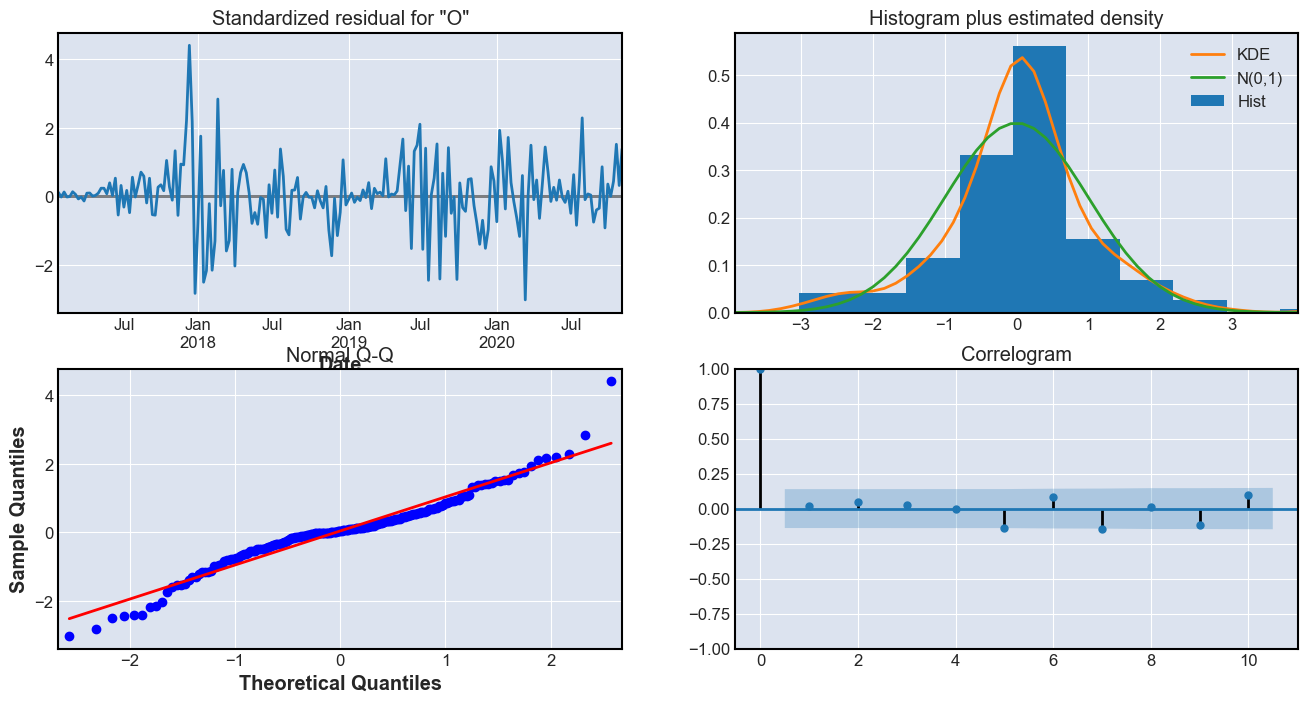

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = False 677.0


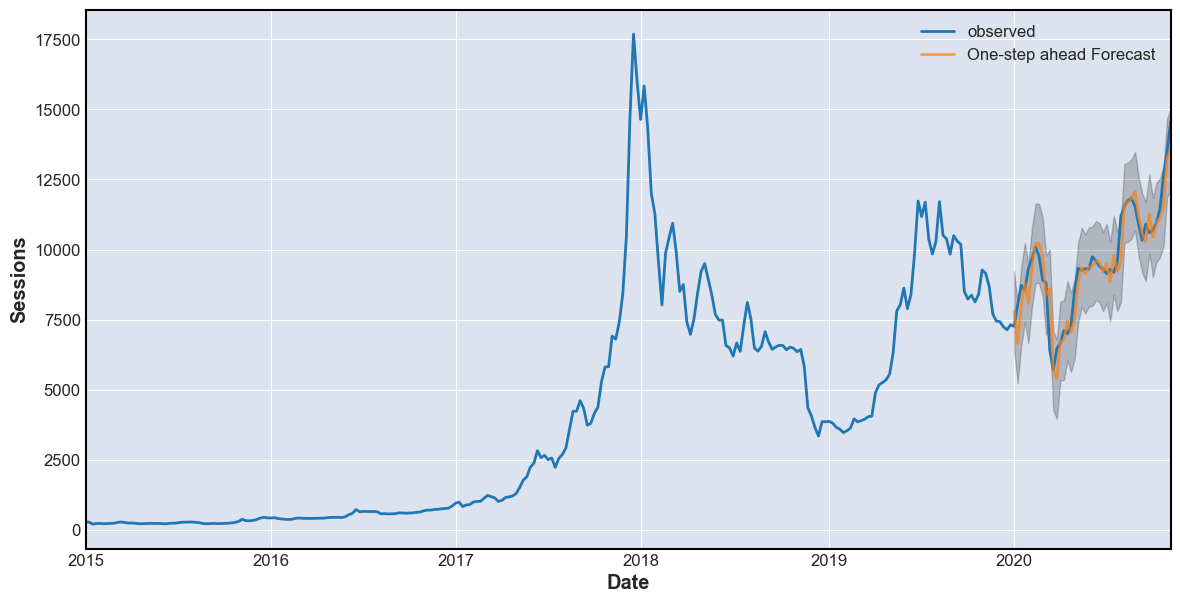

The Root Mean Squared Error of SARIMA with season_length=52 and dynamic = True 3776.86


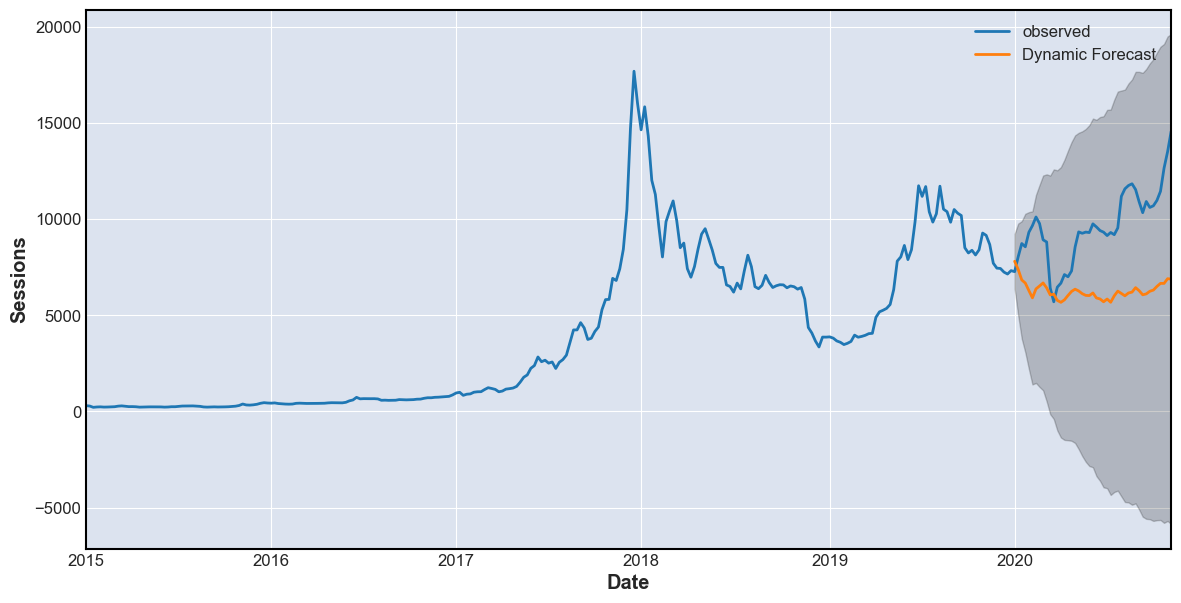

In [19]:
model = sarima_eva(y,(0, 1, 1),(1, 1, 1, 52),52,'2020-01-06',y_to_val)

In [20]:
def forecast(model,predict_steps,y):
    
    pred_uc = model.get_forecast(steps=predict_steps)

    #SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forcasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

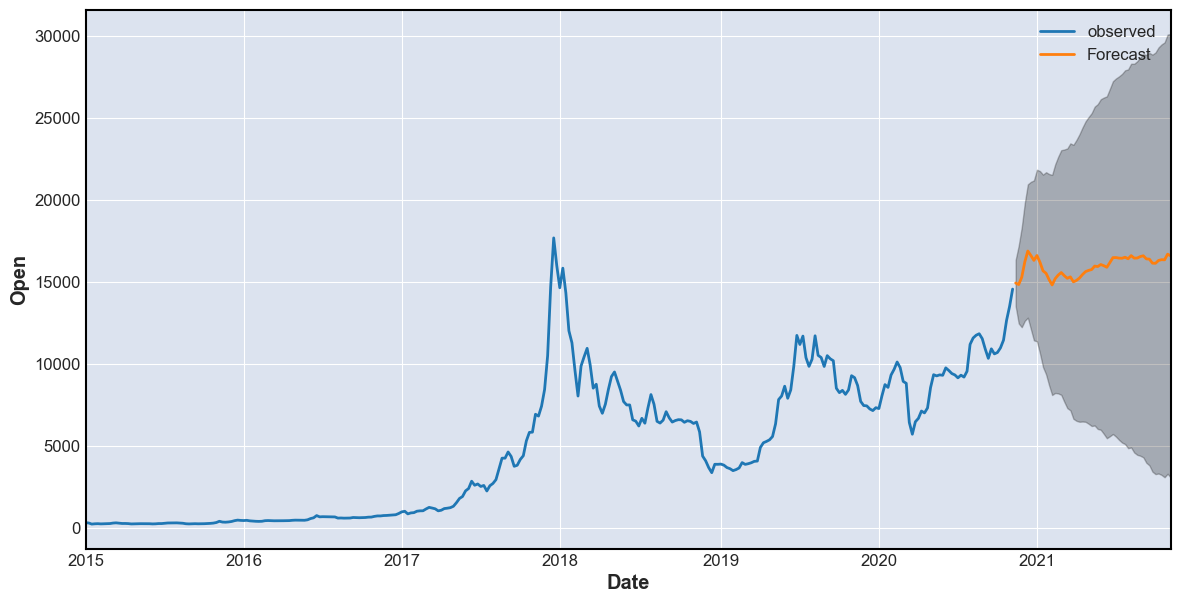

,Date,Predicted_Mean,Lower Bound,Upper Bound
0,2020-11-16,14926.272575,13514.679481,16337.865669
1,2020-11-23,14832.536625,12458.991109,17206.082142
2,2020-11-30,15275.768267,12230.931973,18320.604561
3,2020-12-07,16209.670742,12616.844966,19802.496517
4,2020-12-14,16877.372966,12809.724883,20945.021048


In [21]:

final_table = forecast(model,52,y)
final_table.head()

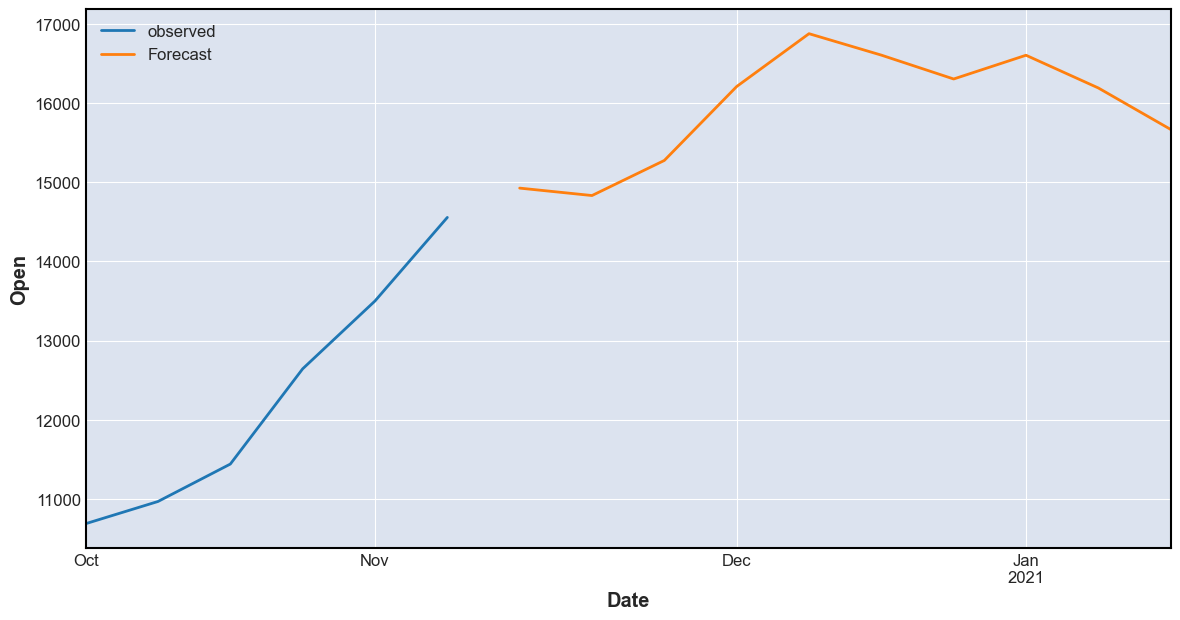

In [35]:
### Graphs without the confident interval 
pred_uc = model.get_forecast(steps=10)
ax = y["2020-10-01":].plot(label='observed', figsize=(14, 7))
#     print(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel(y.name)

plt.legend()
plt.show()

In [37]:
plt.savefig(path_data + 'btcusd-oct20_jan20.pdf')

<Figure size 640x480 with 0 Axes>

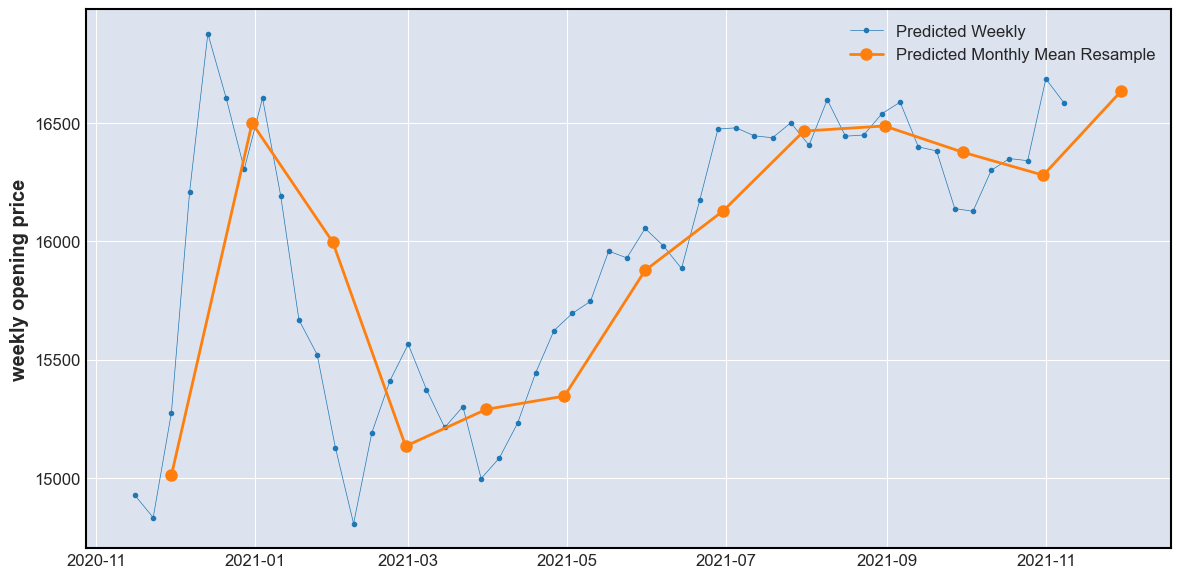

In [33]:
### Graphs show only the perdiected period
final_table.index = final_table.Date
fig, ax = plt.subplots( figsize=(14, 7))
# ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(final_table.Predicted_Mean,marker='.', linestyle='-', linewidth=0.5, label='Predicted Weekly')
# ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(final_table.Predicted_Mean.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Predicted Monthly Mean Resample')
ax.set_ylabel('weekly opening price')
ax.legend();

In [34]:
fig.savefig(path_data + 'btcusd.png')